<a href="https://colab.research.google.com/github/dhirajbbasnet/Operations_Research/blob/main/Chapters/Chapter7Queuing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Queuing Theory





## Introduction






This project is a research on queuing process. In this project we go through the basic idea of how queuing process works. We also go through some of the simple mathematical problems. Python programming language has been used for solving math problems in this project. We will be utilising necessary packages in python to demonstrate our problem and solve it. 




##Theory

###Queue
Queue is a line or sequence of people or vehicles awaiting their turn to be attended to or to proceed.(Shortle, J. F., Thompson, J. M., Gross, D., & Harris, C. M., 2018)
The simplest example of a queue is the typical line that we all participate in from time to time. We wait in a line for a movie, we wait in the check-out line at a grocery store, and we wait in the cafeteria line. Well-behaved lines, or queues, are very restrictive in that they have only one way in and only one way out. These queues must be managed and organized properly; this is where Queuing theory comes in.

###Queuing Theory

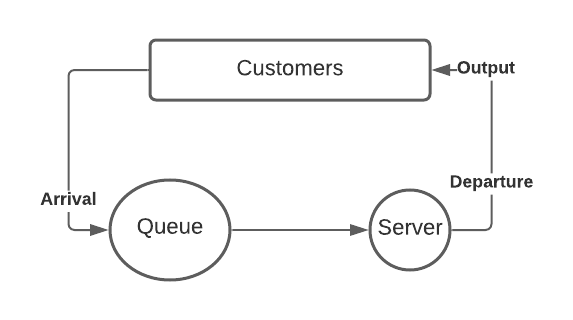

Queueing theory is the mathematical study of how line is form, how it functions (Shortle, et.al, 2018). Queuing theory scrutinizes the entire system of waiting in line, including elements like the customer arrival rate, number of servers, number of customers, capacity of the waiting area, average service completion time, and queuing discipline. The Queuing Theory is concerned with studying all the various dynamics of lines – or “queues” – and how they may be made to operate more efficiently.  In other words, Queuing theory is the study of queues and the random processes that characterize them. It deals with making mathematical sense of real-life scenarios.


## Motivation

Queuing theory is used in our everyday life. Just by knowing a basic knowledge of queueing theory, life can be much easier and convenient. 
In library queuing theory is used to organize collection of books, and some special materials like audio or visual materials.
A queuing system helps minimizing the waiting time of patients and maximizing the utilization of the servers in hospitals.
The capability of these systems can have an important result on the quality of human life and productivity of the process. We have all been in a situation of waiting in line. This process is more common where areas are more congested meaning places with large number of people. We basically must wait in line for everything and every day. We wait in line in our cars in jams or at checkout counters in our grocery stores, So queuing is a model of waiting in lines.
Queuing systems are successfully used for the performance analysis of different systems such as computer, communications, transportation networks and manufacturing. (Bhat, U. N., 2015) 
In easy words, a queuing system consists of customers arriving for a service and waiting if the service is not provided immediately and leaving the system as soon as they are served. Customer does not just mean people here. For instance, it could be an airplane waiting in line for take-off, or a computer program waiting to be run.



#Historical information about queuing theory

Queueing theory was developed to predict the behavior of systems that provide service for randomly arising demands. This does not include unnatural demands. The earliest problems that were studied were of telephone traffic congestion. The investigator was a **Danish mathematician, A. K. Erlang**. He worked towards analyzing telephone traffic congestion with a goal of satisfying the randomly arising demand for the services of the Telephone exchange. Queuing theory was first introduced in the early 20th century.(Shortle, et.al, 2018)

Erlang worked for the Copenhagen Telephone Exchange and wanted to analyze and optimize its operations. He sought to determine how many circuits were needed to provide an acceptable level of telephone service, for people not to be “on hold” (or in a telephone queue) for too long. He was also curious to find out how many telephone operators were needed to process a given volume of calls.
The first paper on queuing theory, “The Theory of Probabilities and Telephone Conversations” was published in 1909 by A.K. Erlang, now considered the father of the field. His work with the Copenhagen Telephone Company is what prompted his initial foray into the field. He pondered the problem of determining how many telephone circuits were necessary to provide phone service that would prevent customers from waiting too long for an available circuit. In developing a solution to this problem, he began to realize that the problem of minimizing waiting time was applicable to many fields, and began developing the theory further.(Shortle, et.al, 2018)
Erlang’s switchboard problem laid the path for modern queuing theory.


## Problem 1

The main project that we are working on is the queueing system of Mc Donalds. If we have ever noticed how the drive thru system of Mc Donald's works, most locations have two lines leading up to the ordering booth. The lines later merge into one as they move through the payment window and serving window. Moreover, the server suggests some customers to park at a designated spot to keep the queue moving. So, we will be modelling the queueing system of Mc Donald's and figure out why most locations are constructed in that way.

We will be using the "ciw" package to demonstrate the queue system which is a python package which makes our tasks a lot easier to model queues. 

We will start by installing the package first.

In [ ]:
pip install ciw

     |████████████████████████████████| 99 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 49.0 MB/s 
     |████████████████████████████████| 46 kB 661 kB/s 
  Created wheel for ciw: filename=Ciw-2.2.1-py3-none-any.whl size=69690 sha256=72657a7eeb7e74e8ca04e350e11634cf6fb4c6b8cc54019ad01e06a47d2313e9
  Stored in directory: /root/.cache/pip/wheels/54/55/07/2c1188b3796b819757608d4a12f1eabcc2ee8f04ec34602fa7
Successfully built ciw
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.14.0 which is incompati

Let's import the ciw package now.

In [ ]:
import ciw

Now we will create a network to model the queueing system. Note that this model consists of only one server, one cashier and one server. This does not represent the designated parking spot. In other words, we have only 3 nodes. We have the following assumptions for the model:
1. Every hour, about 45 customers arrive to the drivethru and get into the line
2. There are no arrivals at any other part of the drivethru since it is a queue.
3. For the service distribution, we assume that an order is made every 10 minutes.
4. The cashier processes one payment every minute.
5. The server serves one order in 2 to 6 minutes assuming that smaller orders take less time and some larger orders take more

Notice that the 3 x 3 matrix named routing represents the overall model.


In [ ]:
N = ciw.create_network(
    arrival_distributions = [ciw.dists.Exponential(0.75), # 45 customers arrive every hour
                             ciw.dists.NoArrivals(), #No arrivals at the other nodes
                             ciw.dists.NoArrivals()],
    service_distributions = [ciw.dists.Exponential(0.5), #1 order is made every 10 minutes
                             ciw.dists.Exponential(1.0),  #A cashier takes one payments every minute
                             ciw.dists.Uniform(2,6)],  #A server serves one order in 2 to 6 minutes   #Customer exits the queue
    routing = [[0.0, 1.0, 0.0],  #The matrix for the network
               [0.0,0.0,1.0],
               [0.0,0.0,0.0]],
    number_of_servers = [1,1,1] #Number of servers
)

Now we will calculate the wait times for the model. We will run the simulation 20 times and calculate the average to get the best representation of wait times. Moreover, we will run the simulation for a period of 180 minutes. Notice that the parameter we have provided is 200 instead of 180. This is to give some cool down time to take some customers out of the queue who are already in there. 

In [ ]:
average_waits = []
for trial in range(20):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(200)
  recs = Q.get_all_records()
  waits = [r.waiting_time for r in recs]
  mean_wait = sum(waits)/len(waits)
  average_waits.append(mean_wait)
print (sum(average_waits)/len(average_waits))

23.172945198218635


So, it looks like average wait times for customers at Mc Donalds is **23.17 minutes** according to our calculations. Like we discussed above, this wait time is in case we have only one ordering booth, one server and one cashier.

In the above code, we can easily change the number of servers and see what kind of difference do they make in the system. We can also calculate how many customers passed through the system after receiving the service within the given time frame. To calculate that we will see how many records lie at node 3 which is our last node since we can be sure that the individuals that go through node 3 have completed the queue. Note that there are certain constraints on our resources as there is a certain amount of time that our resources(booth, cashier, server) take to provide their respective services and only 45 customers come into the drivethru every hour.

In [ ]:
completed_custs = []
for trial in range(20):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(200)
  recs = Q.get_all_records()
  num_completed = len([r for r in recs if r.node==3 and r.arrival_date < 180])
  completed_custs.append(num_completed)

In [ ]:
sum(completed_custs)/len(completed_custs)

47.45

This means that the Mc Donald's location will be able to serve around **47** customers within 3 hours with the resources that they have in this situation.

In the above example, we have only demonstrated a simple system without the designated parking spot. 

##Problem 2

###Adding a designated parking spot

For this part of the problem, we will be adding a designated parking spot so that the customer that have larger orders have to wait at the spot to keep the queue moving. Since it is complex to have multiple parking spots like Mc Donald's usually do, we will be using a single parking spot to makes things easier. We will assume that 30% of the customers have large orders and have to go through the parking spot before leaving the queue. We will be using the same parameters that we used in previous problem to keep the comparisons fair.

In [ ]:
N = ciw.create_network(
    arrival_distributions = [ciw.dists.Exponential(0.75), # 45 customers arrive every hour
                             ciw.dists.NoArrivals(), #No arrivals at the other nodes
                             ciw.dists.NoArrivals(),
                             ciw.dists.NoArrivals(),
                             ciw.dists.NoArrivals()],
    service_distributions = [ciw.dists.Exponential(0.5), #1 order is made every 2 minutes
                             ciw.dists.Exponential(1.0),  #A cashier takes one payments every minute
                             ciw.dists.Exponential(0.5),  #A server serves one order two minutes
                             ciw.dists.Exponential(0.25),    #1 order is given out every 4 minutes]2
                             ciw.dists.Deterministic(0.0)],   #Customer exits the queue
    routing = [[0.0, 1.0, 0.0, 0.0, 0.0],  #The matrix for the network
               [0.0,0.0,1.0,0.0, 0.0],
               [0.0,0.0,0.0,0.3,0.7],
               [0.0,0.0,0.0,0.0,1.0],
               [0.0, 0.0, 0.0, 0.0, 0.0]],
    number_of_servers = [1, 1, 1, 1, 1] #Number of servers
)

Lets simulate this for one shift of breakfast of 3 hours (180 mins). At the beginning of breakfast, the store opens from an empty system. Therefore, no warm-up is required. We will use 20 minutes of cool-down time. We will run 10 trials to get a measure of average number of customers that pass through the system. To find the average number of customers that pass through the system, we ca count the number of data that have passed through node 

In [ ]:
average_waits = []
for trial in range(20):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(200)
  recs = Q.get_all_records()
  waits = [r.waiting_time for r in recs]
  mean_wait = sum(waits)/len(waits)
  average_waits.append(mean_wait)
print (sum(average_waits)/len(average_waits))

10.39426161480664


This shows how much of a difference does it make for Mc Donalds to have a designated parking spot for customers waiting due to large orders. The wait time in this condition goes down to approximately **10 minutes** whereas it was around 23 minutes in the last condition.

In [ ]:
completed_custs = []
for trial in range(20):
  ciw.seed(trial)
  Q = ciw.Simulation(N)
  Q.simulate_until_max_time(200)
  recs = Q.get_all_records()
  num_completed = len([r for r in recs if r.node==5 and r.arrival_date < 180])
  completed_custs.append(num_completed)

In [ ]:
sum(completed_custs)/len(completed_custs)

76.6

We have also found an improvement in how many customers can pass through the queue within 3 hours. The number is now **76** which is much higher than what we had in the first situation. So, by adding only a single parking spot, Mc Donalds can take a lot more customers and provide them with almost half wait times.

##Problem Set

1. In the above example, we have only demonstrated a simple system that includes 1 servers. what kind of difference do they make in the system if we had 2 servers?

2. What does it mean to have an exponential distribution of 0.5 for customer arrival?

3. How would you add a designated parking spot after the pickup window so that customers with large orders are made to wait separately?

4. Compare the wait times for the two models with same number of servers. What kind of difference do you see?

5. What kind of difference do they make in the system if we had 2 servers in the second model?

6. For model two, what would be the best configuration for the queue given that we have 5 employees to work it that we can use for the ordering station, cashier and server? Try playing with different number of cashiers and servers.

7. What queueing discipline does the two models follow? 

8. What kind of limitations do we have on the models above? Could we speed up the queues by making servers more efficient that is decreasing serving times?

9. You replace cashier 1 with a cashier that is twice as fast (the new cashier services jobs at an average rate of 2 payments every minute). Does this “improve- ment” affect the average wait time in the system?

10. What does a M/M/1 queue represent? (Kendall Notation)






##Project Idea

1. In ATM, bank customers arrive randomly and the service time i.e. the time customer takes to do transaction in ATM, is also random.Figure out how queuing can help bank ATM to increase its quality of service, by anticipating, if there are many customers in the queue.

2. A basic model of vehicular traffic based on queuing theory. It will determine the best times of the red, amber, and green lights to be either on or off. Using queuing theory, explore to reduce the delay on the roads.

## References

Shortle, J. F., Thompson, J. M., Gross, D., &amp; Harris, C. M. (2018). Fundamentals of queueing theory. John Wiley &amp; Sons. 

Khinchin A. I︠A︡. (2013). Mathematical methods in the theory of queuing. Dover. 

Bhat, U. N. (2015). An introduction to queueing theory: Modeling and analysis in applications. Birkhäuser. 



### Authors

Subin Manandhar

Dhiraj Basnet

Dichendra Shrestha